<a href="https://colab.research.google.com/github/AbdillahHalim/Credit_Risk_VIX_ID-X-Partners_/blob/main/VIX_idx_Final_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

#Load dataset

•	id              : A unique LC assigned ID for the loan listing                        
•	member_id       : A unique LC assigned ID for the borrower member                   
•	loan_amnt       : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value                    
•	funded_amnt     : The total amount committed to that loan at that point in time                  
•	funded_amnt_inv : The total amount committed by investors for that loan at that point in time              
•	term : The number of payments on the loan                        
•	int_rate : Interest Rate on the loan                     
•	installment: The monthly payment owed by the borrower if the loan originates                   
•	grade : LC assigned loan grade                        
•	sub_grade : LC assigned loan subgrade                   
•	emp_title : The job title supplied by the Borrower when applying for the loan (Employer Title replaces Employer Name for all loans listed after 9/23/2013)                   
•	emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years                 
•	home_ownership : The home ownership status provided by the borrower during registration              
•	annual_inc : The self-reported annual income provided by the borrower during registration                   
•	verification_status : Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified         
•	issue_d : The month which the loan was funded('Jun-2007'-'Dec-2015')                   
•	loan_status : Current status of the loan                  
•	pymnt_plan : Indicates if a payment plan has been put in place for the loan                    
•	url : URL for the LC page with listing data                        
•	desc : Loan description provided by the borrower                      
•	purpose : A category provided by the borrower for the loan request                  
•	title : The loan title provided by the borrower                       
•	zip_code : The first 3 numbers of the zip code provided by the borrower in the loan application                     
•	addr_state : The state provided by the borrower in the loan application           
•	dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income                         
•	delinq_2yrs :  The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years               
•	earliest_cr_line : The month the borrower's earliest reported credit line was opened ('Jan-1944'-'Nov-2012').             
•	inq_last_6mths : Number of credit inquiries in past 12 months               
•	mths_since_last_delinq : he number of months since the borrower's last delinquency    
•	mths_since_last_record : The number of months since the last public record      
•	open_acc : The number of open credit lines in the borrower's credit file                    
•	pub_rec : Number of derogatory public records                    
•	revol_bal : Total credit revolving balance
•	revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit                   
•	total_acc : The total number of credit lines currently in the borrower's credit file                
•	initial_list_status : The initial listing status of the loan          
•	out_prncp : Remaining outstanding principal for total amount funded                    
•	out_prncp_inv : Remaining outstanding principal for portion of total amount funded by investors              
•	total_pymnt : Payments received to date for total amount funded                  
•	total_pymnt_inv : Payments received to date for portion of total amount funded by investors             
•	total_rec_prncp : Principal received to date
•	total_rec_int : Interest received to date               
•	total_rec_late_fee :  Late fees received to date       
•	recoveries : Post charge off gross recovery            
•	collection_recovery_fee : Post charge off collection fee     
•	last_pymnt_d : Last month payment was received ('Dec-2007'-'Jan-2016')                 
•	last_pymnt_amnt : Last total payment amount received              
•	next_pymnt_d : Next scheduled payment date ('Dec-2007'-'Mar-2016')                 
•	last_credit_pull_d : The most recent month LC pulled credit for this loan ('May-2007'-'Jan-2016')          
•	collections_12_mths_ex_med : Number of collections in 12 months excluding medical collections   
•	mths_since_last_major_derog : Months since most recent 90-day or worse rating
•	policy_code : Publicly available products ('policy_code'='1'), New products not publicly available ('policy_code'='2')                
•	application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers             
•	annual_inc_joint : The combined self-reported annual income provided by the co-borrowers during registration
•	dti_joint : A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income                    
•	verification_status_joint : Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified    
•	acc_now_delinq : The number of accounts on which the borrower is now delinquent
•	tot_coll_amt : Total collection amounts ever owed                
•	tot_cur_bal : Total current balance of all accounts                  
•	open_acc_6m : Number of open trades in last 6 months                 
•	open_il_6m : Number of currently active installment trades                  
•	open_il_12m : Number of installment accounts opened in past 12 months
•	open_il_24m : Number of installment accounts opened in past 24 months                 
•	mths_since_rcnt_il : Months since most recent installment accounts opened          
•	total_bal_il : Total current balance of all installment accounts               
•	il_util : Ratio of total current balance to high credit/credit limit on all install acct                     
•	open_rv_12m : Number of revolving trades opened in past 12 months                  
•	open_rv_24m : Number of revolving trades opened in past 24 months                
•	max_bal_bc : Maximum current balance owed on all revolving accounts                   
•	all_util : Balance to credit limit on all trades                     
•	total_rev_hi_lim : Total revolving high credit/credit limit             
•	inq_fi : Number of personal finance inquiries                       
•	total_cu_tl : Number of finance trades                  
•	inq_last_12m : Number of credit inquiries in past 12 months


In [5]:
df = pd.read_csv("/content/drive/MyDrive/colab_dataset/Idx_partners/loan_data_2007_2014.csv")

<ipython-input-5-ee612a2aaecd>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/colab_dataset/Idx_partners/loan_data_2007_2014.csv")


#EDA

In [7]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(466285, 75)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

<Axes: >

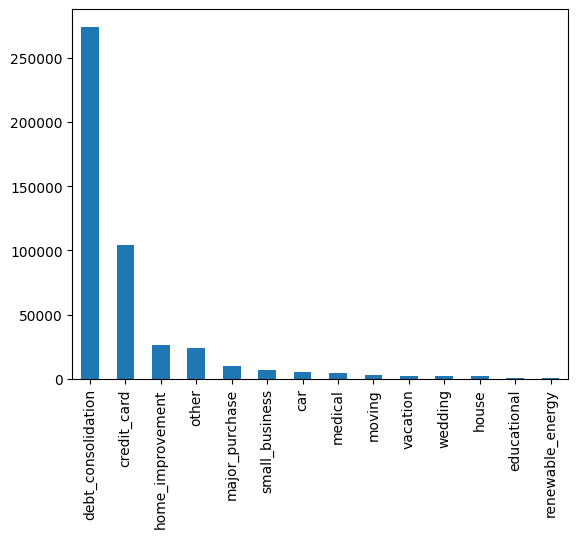

In [10]:
df['purpose'].value_counts().plot(kind='bar')

<Axes: >

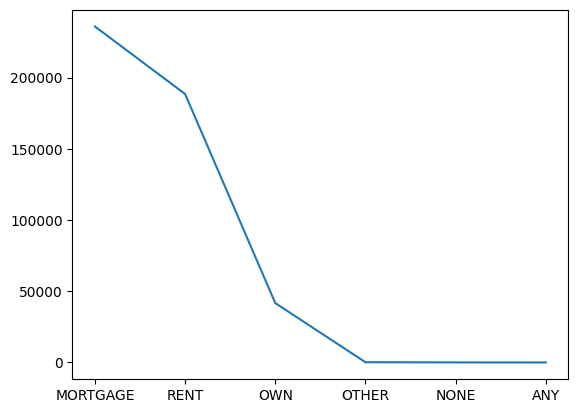

In [11]:
df['home_ownership'].value_counts().plot()

<Axes: >

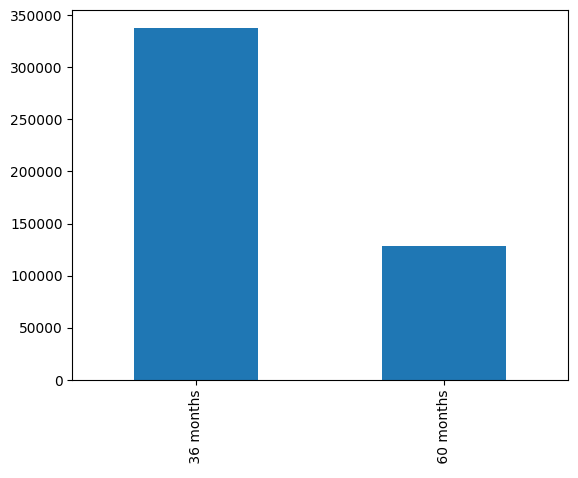

In [12]:
df['term'].value_counts().plot(kind='bar')

<Axes: >

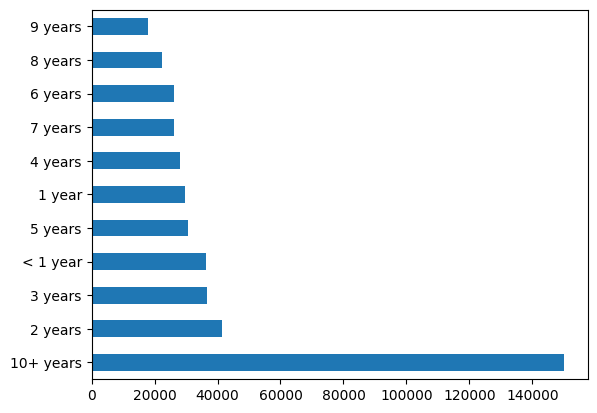

In [13]:
df['emp_length'].value_counts().plot(kind='barh')

<Axes: >

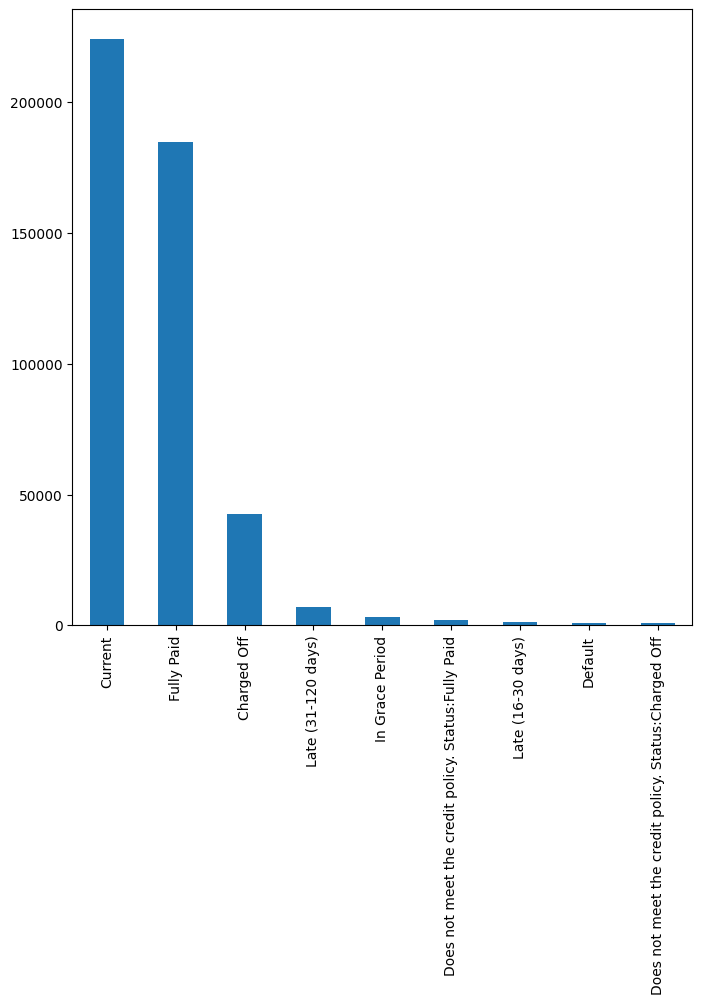

In [14]:
loanStatus = df['loan_status'].value_counts()
loanStatus.plot(figsize=(8,8),kind='bar')

Attributes loan_status

- 'Default' : Loans that have been defaulted.
- 'Does not meet the credit policy. Status:Charged Off' : Loans that do not meet the LC credit policy and has been written-off.
- 'Charged Off' : The loan balance has been reduced to zero by recognizing the recorded value as an expense.
- 'Late (31-120 days)' : Loan the installment payments of which, have been delayed for 31-120 days.
- 'Late (16-30 days)' : Loan the installment payments of which have been delayed for 16-30 days.
- 'Issued' : Loans that have been just issued.
- 'In Grace Period' : Loans that have been issued and they are currently being in grace period.
- 'Current' : Loans that are currently active and serviced.
- 'Does not meet the credit policy. Status:Fully Paid' : Loans that do not meet the LC credit policy, but they have been fully-paid.
- 'Fully Paid': Loans that have been fully paid.

In [15]:
print(loanStatus)

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


good loan :
- Issued
- In Grace Period
- Does not meet the credit policy. Status:Fully Paid
- Fully Paid

bad loan :     
- Late (31-120 days)
- Late (16-30 days)
- Does not meet the credit policy. Status:Charged Off
- Default

ambigu :    
- Current

Create a target variable from loan_status, and fill these variables with the values ​​good_loans(1) and bad_loans(0), for ambiguous data it will be identified more deeply and it will be determined whether the data falls into the good_loan or bad_loan category


In [16]:
dx = df.copy()

good_loans = ['Issued',
              'In Grace Period',
              'Does not meet the credit policy. Status:Fully Paid',
              'Fully Paid']
dx['good_bad_loan'] = np.where(dx['loan_status'].isin(good_loans), 1, 0)

<Axes: title={'center': 'Good (1) vs Bad (0) Loans Balance'}>

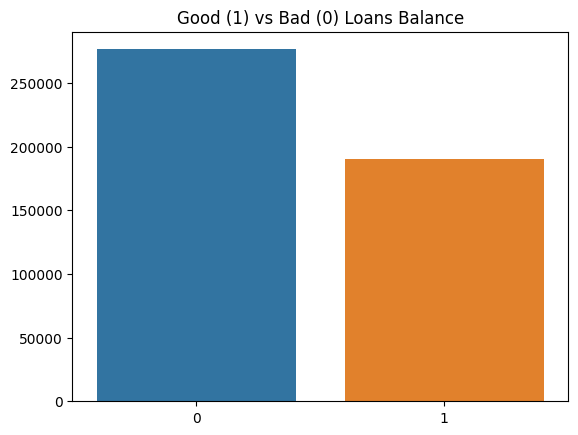

In [17]:
plt.title('Good (1) vs Bad (0) Loans Balance')
sns.barplot(x=dx.good_bad_loan.value_counts().index,y=dx.good_bad_loan.value_counts().values)

In [18]:
currentLoan = ['Current']
dx['currentLoan'] = np.where(dx['loan_status'].isin(good_loans), 1, 0)

In [19]:
purposeLoan = dx[['purpose', 'good_bad_loan']].groupby(['purpose', 'good_bad_loan']).\
              agg(count=('good_bad_loan','count'))
purposeLoan

count
purpose            good_bad_loan        
car                0                2364
                   1                3033
credit_card        0               65092
                   1               39065
debt_consolidation 0              164970
                   1              109225
educational        0                  88
                   1                 334
home_improvement   0               15125
                   1               11412
house              0                1036
                   1                1233
major_purchase     0                4752
                   1                5076
medical            0                2480
                   1                2122
moving             0                1544
                   1                1450
other              0               13182
                   1               10508
renewable_energy   0                 146
                   1                 205
small_business     0                3716
                   1                3297
vacation           0                1309
                   1                1178
wedding            0                 608
                   1                1735

The number of purposes based on the categories of good loans and bad loans

In [20]:
empLength = dx[['emp_length', 'good_bad_loan']].groupby(['emp_length', 'good_bad_loan']).\
              agg(count=('good_bad_loan','count'))
empLength

count
emp_length good_bad_loan       
1 year     0              16728
           1              12894
10+ years  0              93079
           1              56970
2 years    0              23378
           1              17995
3 years    0              21024
           1              15572
4 years    0              15611
           1              12412
5 years    0              16888
           1              13886
6 years    0              14732
           1              11380
7 years    0              15507
           1              10673
8 years    0              13653
           1               8742
9 years    0              10818
           1               7070
< 1 year   0              20458
           1              15807

The number of employment length based on the categories of good loans and bad loans

In [21]:
termLoan = dx[['term', 'good_bad_loan']].groupby(['term','good_bad_loan']).\
            agg(count=('term','count'))
termLoan

count
term       good_bad_loan        
 36 months 0              183084
           1              154869
 60 months 0               93328
           1               35004

The number of term based on the categories of good loans and bad loans

In [22]:
homeOwner = dx[['home_ownership', 'good_bad_loan']].groupby(['home_ownership', 'good_bad_loan']).\
                  agg(count=('home_ownership','count'))

homeOwner

count
home_ownership good_bad_loan        
ANY            1                   1
MORTGAGE       0              140285
               1               95590
NONE           0                  10
               1                  40
OTHER          0                  41
               1                 141
OWN            0               25915
               1               15789
RENT           0              110161
               1               78312

The number of home ownership based on the categories of good loans and bad loans

<Axes: >

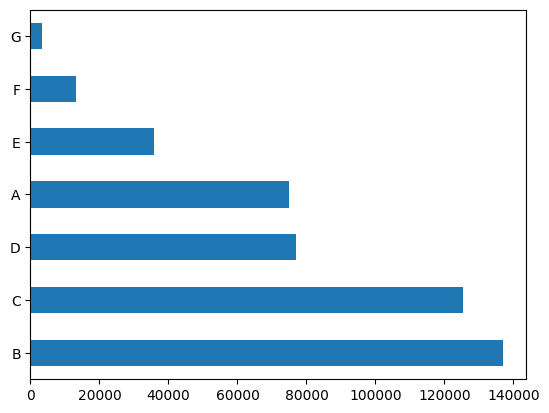

In [23]:
dx['grade'].value_counts().plot(kind='barh')

Loan grade attributes describe the risk levels associated with borrowers based on their creditworthiness and financial stability.

Grade A:
Borrowers with grade A have the lowest risk. They have an excellent credit history, stable income, and a low debt-to-income ratio.

Grade B:
Grade B typically includes borrowers with moderate risk. They may have a good credit history but might have a few instances of late payments or a slightly higher debt-to-income ratio.

Grade C:
Borrowers in category C have higher risk compared to A and B.

Grade D:
Grade D includes borrowers with significant risk.

Grade E, F, G, H, etc.:
These grades generally represent borrowers with increasing levels of risk. They might have poor credit history, unstable income, or a very high debt-to-income ratio.

It's important to note that these loan grades are commonly used in lending and financial institutions to assess the risk associated with lending money to different borrowers. The grading system helps lenders make informed decisions about interest rates, loan terms, and approval for loan applications based on the borrower's risk profile.

<Axes: >

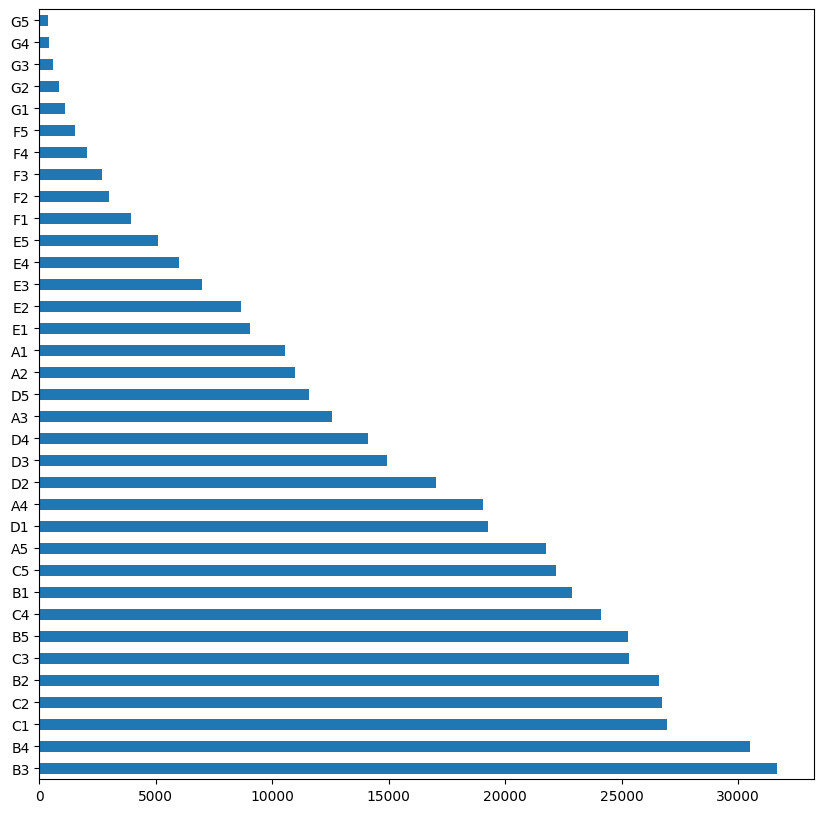

In [24]:
dx['sub_grade'].value_counts().plot(kind='barh', figsize=(10,10))

Subgrade A1, A2, A3, etc.:
These subgrades might be found within the loan grade category A. Borrowers in subgrade A1 tend to have the lowest risk among others within grade A. They may have an excellent credit history and other factors indicating high financial stability. The next subgrades (such as A2, A3, and so on) may indicate a slight increase in credit risk.

Subgrade B1, B2, B3, etc.:
These subgrades might be found within the loan grade category B. Borrowers in subgrade B1 may have low to moderate risk. They may have a good credit history but there are some factors that might make them riskier than borrowers in subgrade A. The next subgrades could indicate a gradual increase in risk.

Subgrade C1, C2, C3, etc.:
These subgrades might be found within the loan grade category C. Borrowers in subgrade C1 may have moderate to high risk. They might have a credit history that includes some payment delays or other factors indicating greater risk than the subgrades below them.

Subgrade D1, D2, D3, etc.:
These subgrades might be found within the loan grade category D. Borrowers in subgrade D1 have higher risk compared to other subgrades within grade D. They might have an unstable payment history, high debt-to-income ratio, or other factors indicating significant credit risk.

Subgrade E1, E2, E3, etc.:
Borrowers in subgrade E face significant credit risk. They might have a poor credit history, frequent payment delays, or a very high debt-to-income ratio. Subgrade E1 might indicate the lowest risk within category E, while subgrades E2, E3, and so on could indicate gradually increasing risk.

Subgrade F1, F2, F3, etc.:
Subgrades in category F indicate higher levels of credit risk. Borrowers in these subgrades might have very poor payment history and financial factors indicating instability. Interest rates for loans in subgrade F are likely to be higher to compensate for greater risk.

Subgrade G1, G2, G3, etc.:
Subgrades in category G indicate very high credit risk. Borrowers in these subgrades are likely to have extremely poor credit records, numerous payment delays, and highly unstable financial conditions. Interest rates in subgrade G might be the highest, reflecting the high risk for lenders.

These subgrade attributes provide a more detailed assessment of borrower risk within each main loan grade category, allowing lenders to make finer distinctions when determining loan terms and interest rates.

In [25]:
gradeLoan = dx[['grade','good_bad_loan']].groupby(['grade','good_bad_loan']).\
            agg(count=('good_bad_loan','count'))

gradeLoan

count
grade good_bad_loan       
A     0              38146
      1              36721
B     0              75017
      1              61912
C     0              78094
      1              47199
D     0              49592
      1              27296
E     0              24368
      1              11389
F     0               8964
      1               4265
G     0               2231
      1               1091

The number of grade based on the categories of good loans and bad loans

In [26]:
gradeCurrentLoan = dx[['grade', 'currentLoan']].groupby(['grade','currentLoan']).\
            agg(count=('currentLoan','count')).reset_index()

grade_filtered = gradeCurrentLoan[gradeCurrentLoan['currentLoan'] == 1].set_index("grade")
grade_filtered

,currentLoan,count
grade,,
A,1,36721
B,1,61912
C,1,47199
D,1,27296
E,1,11389
F,1,4265
G,1,1091


The number of grade based on the categories of good loans and bad loans

<Axes: xlabel='grade'>

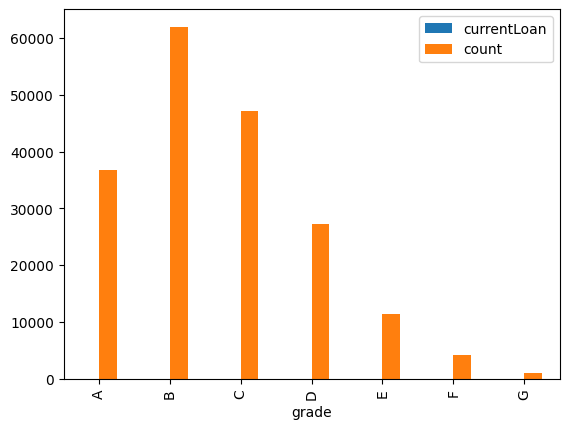

In [27]:
grade_filtered.plot(kind='bar')

Grade A, B, C, D, E, F, and G all have a number of loans with currentLoan=1. This indicates that in each loan grade category, there are borrowers who have active loans.
The number of loans tends to decrease as the loan grade decreases. In other words, borrowers with grade A have a higher number of active loans (currentLoan=1) compared to borrowers with grade B, and so on down to grade G.
Therefore, it can be concluded that the data from the "Current" category falls into the category of good loans.
This analysis suggests that borrowers across different loan grades have active loans, with higher-grade borrowers (Grade A) having a higher number of active loans compared to lower-grade borrowers (Grade G). Additionally, since the data from the "Current" category is associated with good loans, it likely indicates that borrowers with active loans in various grades are currently in good standing with their loan payments.

In [28]:
good_loans = ['Current',
              'Issued',
              'In Grace Period',
              'Does not meet the credit policy. Status:Fully Paid',
              'Fully Paid']
df['good_bad_loan'] = np.where(df['loan_status'].isin(good_loans), 1, 0)

<Axes: title={'center': 'Good (1) vs Bad (0) Loans Balance'}>

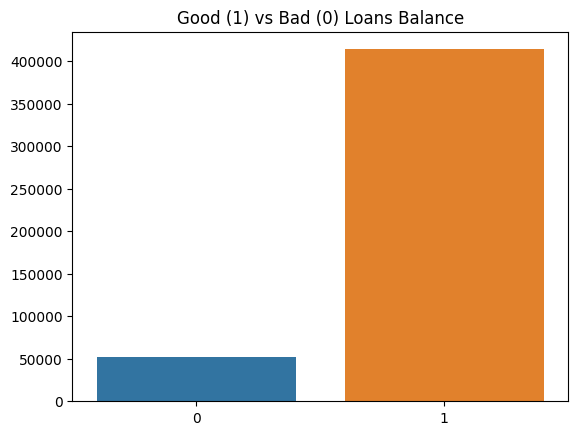

In [29]:
plt.title('Good (1) vs Bad (0) Loans Balance')
sns.barplot(x=df.good_bad_loan.value_counts().index,y=df.good_bad_loan.value_counts().values)

Based on the visualization above, the column "good_bad_loan" has an imbalanced value distribution.

##Checking Correlation

In [30]:
#Converting all data to numeric data using Label Encoder.label = LabelEncoder()
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='O').columns:
    df_encoded[col]=label.fit_transform(df_encoded[col])

In [31]:
correlation = df_encoded.corr()
sorted_data = correlation['good_bad_loan'].sort_values(ascending=False)
filtered_data = sorted_data[sorted_data > 0.01]  # Filtering data with correlation above 0%.
print(filtered_data)

good_bad_loan          1.000000
total_rec_prncp        0.254255
loan_status            0.224107
total_pymnt_inv        0.194638
total_pymnt            0.193977
last_pymnt_amnt        0.170164
out_prncp              0.150442
out_prncp_inv          0.150430
member_id              0.092375
id                     0.091531
Unnamed: 0             0.053289
tot_cur_bal            0.050865
annual_inc             0.049484
initial_list_status    0.045777
total_rev_hi_lim       0.037735
desc                   0.033252
total_rec_int          0.022833
total_acc              0.022366
revol_bal              0.018536
issue_d                0.016134
Name: good_bad_loan, dtype: float64


<ipython-input-32-1d53fe8e874c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataCorr.corr(), annot=True, cmap='coolwarm')


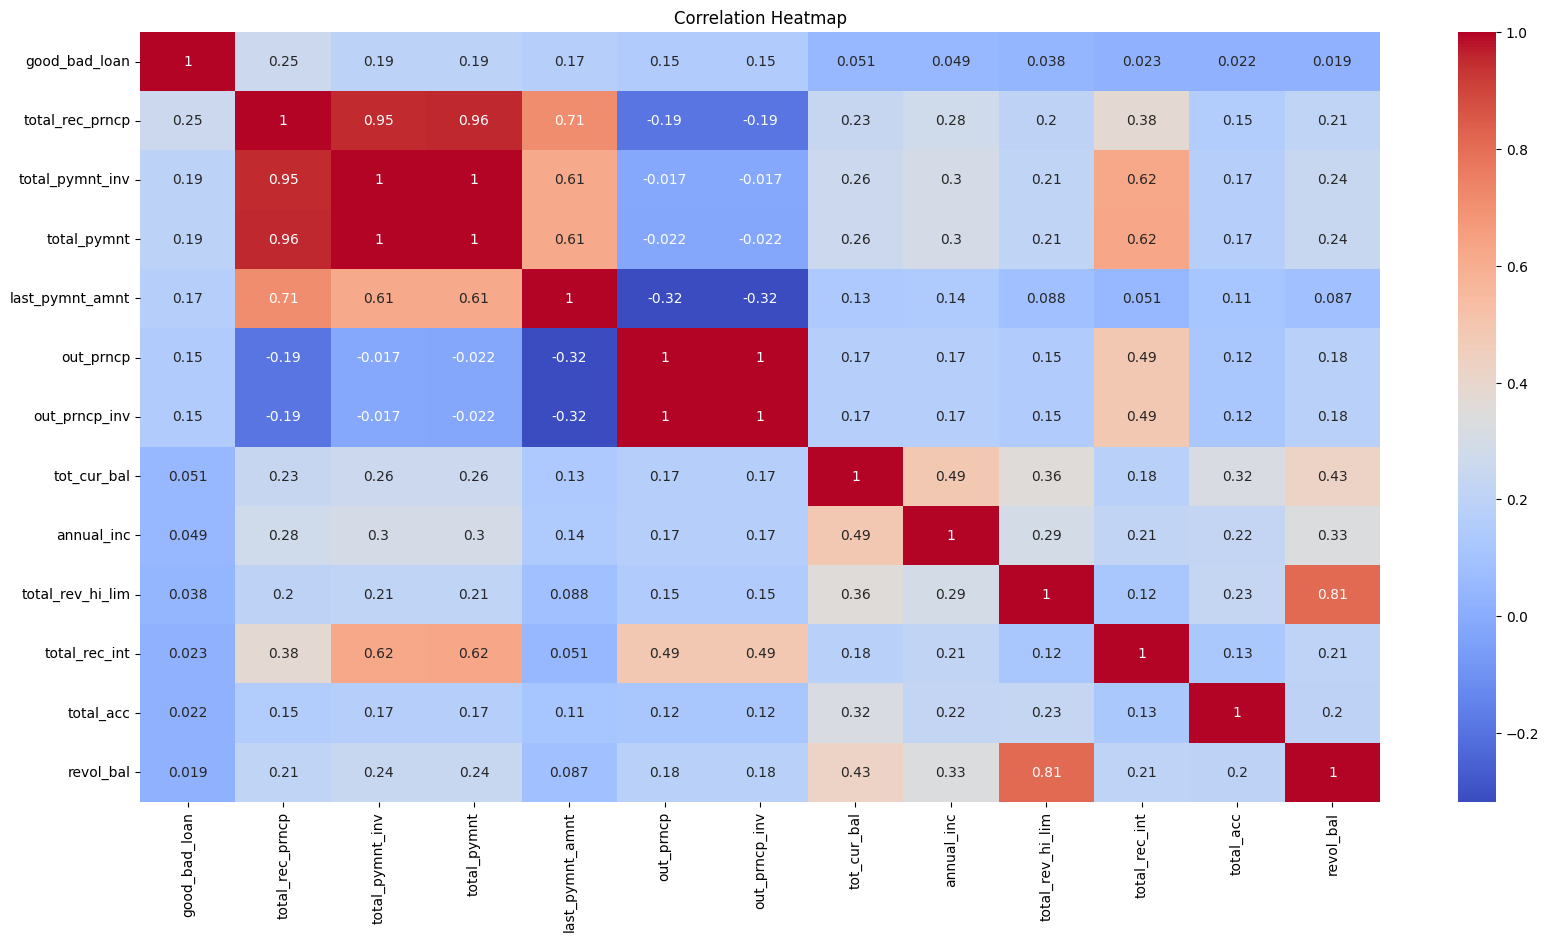

In [32]:
dataCorr = df[['good_bad_loan', 'total_rec_prncp', 'loan_status','total_pymnt_inv','total_pymnt','last_pymnt_amnt','out_prncp','out_prncp_inv','tot_cur_bal','annual_inc',
              'initial_list_status','total_rev_hi_lim','desc', 'total_rec_int', 'total_acc','revol_bal','issue_d']]
plt.figure(figsize=(20, 10))
sns.heatmap(dataCorr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

total_pymnt and total_pymnt_inv have the same correlation, then out_prncp and out_prncp_inv have the same correlation, it is better to identify further whether the following columns have the same value


In [33]:
dataCorr[['total_pymnt', 'total_pymnt_inv']].describe()

,total_pymnt,total_pymnt_inv
count,466285.000000,466285.000000
mean,11540.686220,11469.892747
std,8265.627112,8254.157579
min,0.000000,0.000000
25%,5552.125349,5499.250000
50%,9419.250943,9355.430000
75%,15308.158460,15231.310000
max,57777.579870,57777.580000


total_pymnt and total_pymnt_inv do not have the same value

In [34]:
dataCorr[['out_prncp','out_prncp_inv']].describe()

,out_prncp,out_prncp_inv
count,466285.000000,466285.000000
mean,4410.062342,4408.452258
std,6355.078769,6353.198001
min,0.000000,0.000000
25%,0.000000,0.000000
50%,441.470000,441.380000
75%,7341.650000,7338.390000
max,32160.380000,32160.380000


out_prncp and out_prncp_inv have the same value


In [35]:
#drop data out_prncp_inv
dataCorr = dataCorr.drop('out_prncp_inv', axis=1)

In [36]:
dataCorr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   good_bad_loan        466285 non-null  int64  
 1   total_rec_prncp      466285 non-null  float64
 2   loan_status          466285 non-null  object 
 3   total_pymnt_inv      466285 non-null  float64
 4   total_pymnt          466285 non-null  float64
 5   last_pymnt_amnt      466285 non-null  float64
 6   out_prncp            466285 non-null  float64
 7   tot_cur_bal          396009 non-null  float64
 8   annual_inc           466281 non-null  float64
 9   initial_list_status  466285 non-null  object 
 10  total_rev_hi_lim     396009 non-null  float64
 11  desc                 125983 non-null  object 
 12  total_rec_int        466285 non-null  float64
 13  total_acc            466256 non-null  float64
 14  revol_bal            466285 non-null  int64  
 15  issue_d          

##Checking Na values

In [37]:
data_= pd.DataFrame(dataCorr.isnull().sum(),columns=['Number Of Null'])
data_['Percentage']=data_['Number Of Null']/dataCorr.shape[0]*100
data_

,Number Of Null,Percentage
good_bad_loan,0,0.000000
total_rec_prncp,0,0.000000
loan_status,0,0.000000
total_pymnt_inv,0,0.000000
total_pymnt,0,0.000000
last_pymnt_amnt,0,0.000000
out_prncp,0,0.000000
tot_cur_bal,70276,15.071469
annual_inc,4,0.000858
initial_list_status,0,0.000000


Columns that have Na values ​​of more than 50% will not be used, then identifying patterns from NA values ​​in columns that have Na values ​​of less than 50%


###Identify columns with Na values

####Identify variable distribution for columns with Na values

In [38]:
# visualization for the distribution of variables
def diagnostic_plots(dataCorr, variable):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

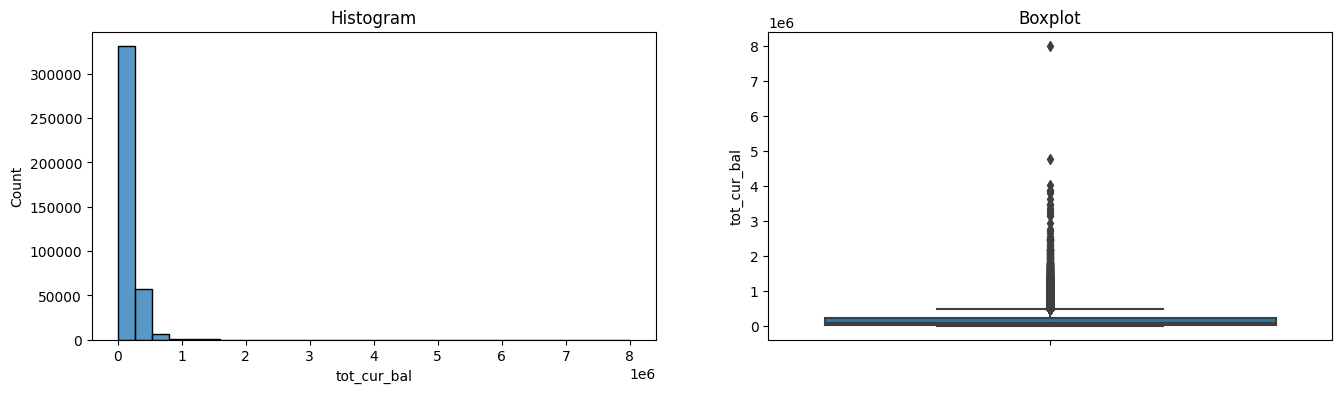

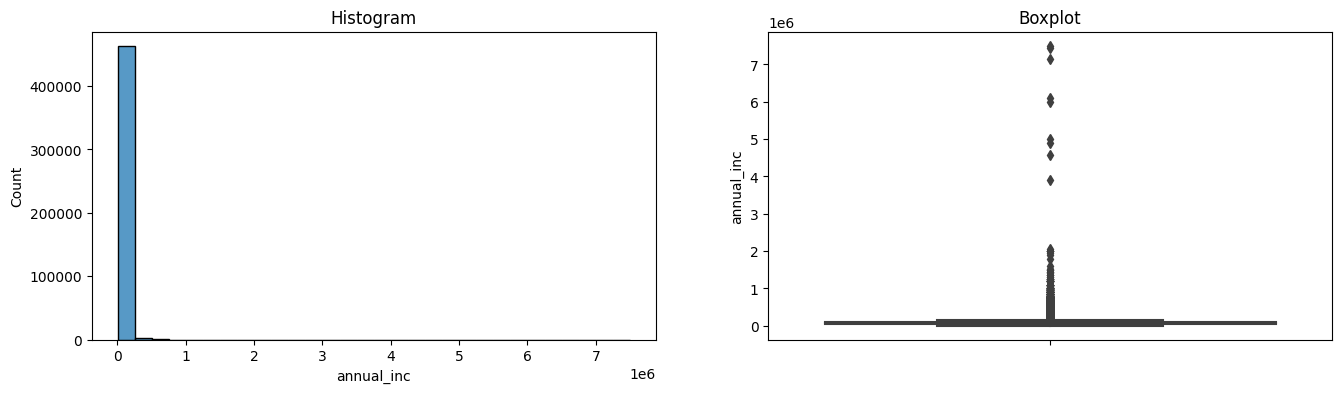

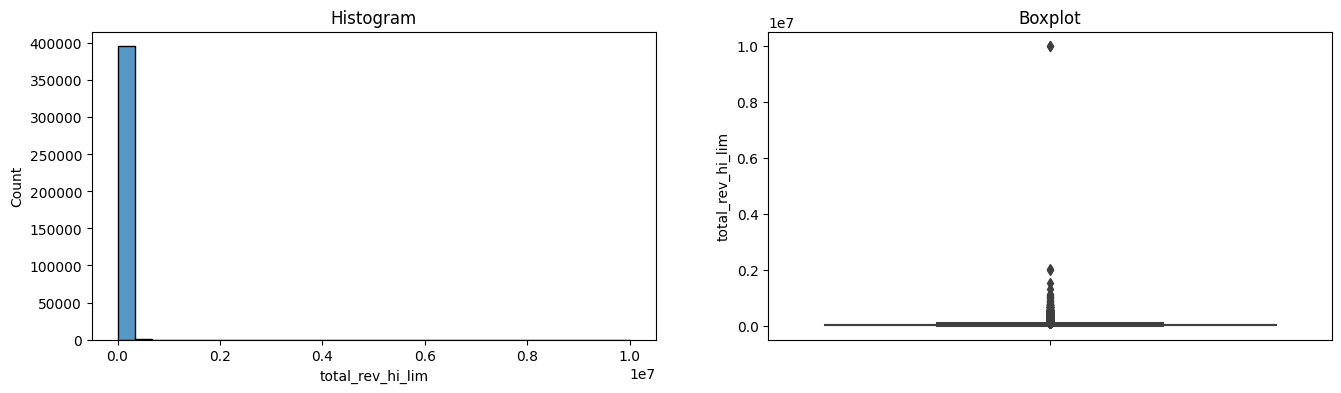

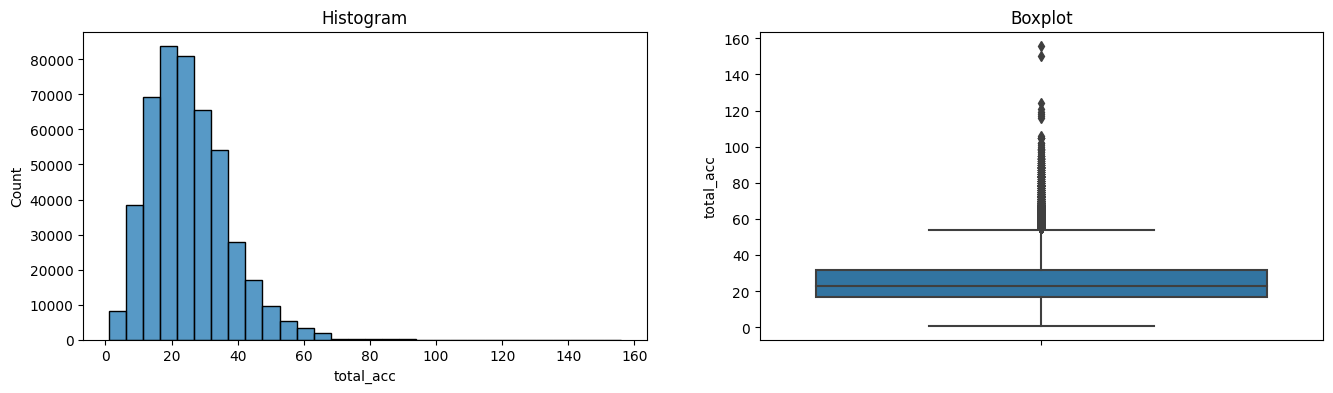

In [39]:
diagnostic_plots(dataCorr, 'tot_cur_bal')
diagnostic_plots(dataCorr, 'annual_inc')
diagnostic_plots(dataCorr, 'total_rev_hi_lim')
diagnostic_plots(dataCorr, 'total_acc')

In [40]:
print('tot_cur_bal Skewness Value           : ', dataCorr['tot_cur_bal'].skew())
print('annual_inc Skewness Value            : ', dataCorr['annual_inc'].skew())
print('total_rev_hi_lim Skewness Value      : ', dataCorr['total_rev_hi_lim'].skew())
print('total_acc Skewness Value             : ', dataCorr['total_acc'].skew())

tot_cur_bal Skewness Value           :  3.047906077706473
annual_inc Skewness Value            :  29.568905376722288
total_rev_hi_lim Skewness Value      :  100.58559011770757
total_acc Skewness Value             :  0.8130610563703684


It can be concluded that the four columns are not normally distributed


####Missing Data Mechanisms

In [41]:
dataCorr['tot_cur_bal_null'] = np.where(dataCorr.tot_cur_bal.isnull(), 1, 0)
dataCorr['annual_inc_null'] = np.where(dataCorr.annual_inc.isnull(), 1, 0)
dataCorr['total_rev_hi_lim_null'] = np.where(dataCorr.total_rev_hi_lim.isnull(), 1, 0)
dataCorr['total_acc_null'] = np.where(dataCorr.total_acc.isnull(), 1, 0)
dataCorr.head()

,good_bad_loan,total_rec_prncp,loan_status,total_pymnt_inv,total_pymnt,last_pymnt_amnt,out_prncp,tot_cur_bal,annual_inc,initial_list_status,total_rev_hi_lim,desc,total_rec_int,total_acc,revol_bal,issue_d,tot_cur_bal_null,annual_inc_null,total_rev_hi_lim_null,total_acc_null
0,1,5000.00,Fully Paid,5831.78,5861.071414,171.62,0.0,NaN,24000.0,f,NaN,Borrower added on 12/22/11 > I need to upgra...,861.07,9.0,13648,Dec-11,1,0,1,0
1,0,456.46,Charged Off,1008.71,1008.710000,119.66,0.0,NaN,30000.0,f,NaN,Borrower added on 12/22/11 > I plan to use t...,435.17,4.0,1687,Dec-11,1,0,1,0
2,1,2400.00,Fully Paid,3003.65,3003.653644,649.91,0.0,NaN,12252.0,f,NaN,NaN,603.65,10.0,2956,Dec-11,1,0,1,0
3,1,10000.00,Fully Paid,12226.30,12226.302210,357.48,0.0,NaN,49200.0,f,NaN,Borrower added on 12/21/11 > to pay for prop...,2209.33,37.0,5598,Dec-11,1,0,1,0
4,1,2233.10,Current,3242.17,3242.170000,67.79,766.9,NaN,80000.0,f,NaN,Borrower added on 12/21/11 > I plan on combi...,1009.07,38.0,27783,Dec-11,1,0,1,0


####Checking tot_cur_bal_null

In [42]:
print('Value Counts')
print(dataCorr.groupby(['loan_status'])['tot_cur_bal_null'].value_counts())

print('\nMean')
print(dataCorr.groupby(['loan_status'])['tot_cur_bal_null'].mean())

Value Counts
loan_status                                          tot_cur_bal_null
Charged Off                                          0                    32456
                                                     1                    10019
Current                                              0                   220639
                                                     1                     3587
Default                                              0                      814
                                                     1                       18
Does not meet the credit policy. Status:Charged Off  1                      761
Does not meet the credit policy. Status:Fully Paid   1                     1988
Fully Paid                                           0                   131050
                                                     1                    53689
In Grace Period                                      0                     3080
                                     

In the tot_cur_bal_null column, data related to the value 'Does not meet the credit policy. Status:Charged Off' and 'Does not meet the credit policy. Status: Fully Paid' has no value at all, there are several missing values ​​in the other columns


####Checking annual_inc_null

In [43]:
print('Value Counts')
print(dataCorr.groupby(['loan_status'])['annual_inc_null'].value_counts())

print('\nMean')
print(dataCorr.groupby(['loan_status'])['annual_inc_null'].mean())

Value Counts
loan_status                                          annual_inc_null
Charged Off                                          0                   42475
Current                                              0                  224226
Default                                              0                     832
Does not meet the credit policy. Status:Charged Off  0                     761
Does not meet the credit policy. Status:Fully Paid   0                    1984
                                                     1                       4
Fully Paid                                           0                  184739
In Grace Period                                      0                    3146
Late (16-30 days)                                    0                    1218
Late (31-120 days)                                   0                    6900
Name: annual_inc_null, dtype: int64

Mean
loan_status
Charged Off                                            0.000000
Current   

in the column annual_inc_null there is a missing value with data related to "Does not meet the credit policy. Status: Fully Paid"


####Checking total_rev_hi_lim_null

In [44]:
print('Value Counts')
print(dataCorr.groupby(['loan_status'])['total_rev_hi_lim_null'].value_counts())

print('\nMean')
print(dataCorr.groupby(['loan_status'])['total_rev_hi_lim_null'].mean())

Value Counts
loan_status                                          total_rev_hi_lim_null
Charged Off                                          0                         32456
                                                     1                         10019
Current                                              0                        220639
                                                     1                          3587
Default                                              0                           814
                                                     1                            18
Does not meet the credit policy. Status:Charged Off  1                           761
Does not meet the credit policy. Status:Fully Paid   1                          1988
Fully Paid                                           0                        131050
                                                     1                         53689
In Grace Period                                      0        

Same as before in the column total_rev_hi_lim_null data related to 'Does not meet the credit policy. Status:Charged Off' and 'Does not meet the credit policy. Status: Fully Paid' has no value at all, there are several missing values ​​in the other columns


####Checking total_acc_null

In [45]:
print('Value Counts')
print(dataCorr.groupby(['loan_status'])['total_acc_null'].value_counts())

print('\nMean')
print(dataCorr.groupby(['loan_status'])['total_acc_null'].mean())

Value Counts
loan_status                                          total_acc_null
Charged Off                                          0                  42475
Current                                              0                 224226
Default                                              0                    832
Does not meet the credit policy. Status:Charged Off  0                    758
                                                     1                      3
Does not meet the credit policy. Status:Fully Paid   0                   1962
                                                     1                     26
Fully Paid                                           0                 184739
In Grace Period                                      0                   3146
Late (16-30 days)                                    0                   1218
Late (31-120 days)                                   0                   6900
Name: total_acc_null, dtype: int64

Mean
loan_status
Charged 

In the total_acc_null column there is a missing value with data related to "Does not meet the credit policy. Status: Charged Off" and "Does not meet the credit policy. Status: Fully Paid"


Handling Missing value is to replace the data in the annual_inc and total_acc columns with zero(0), then use the median imputation in the tot_cur_bal and total_rev_hi_lim column, the data related to the 'Does not meet the credit policy' value. Status:Charged Off' and 'Does not meet the credit policy. Status: Fully Paid' has no value at all, there are several missing values ​​in the other columns and total_rev_hi_lim_null because the two columns are not normally distributed


#Preprocessing

##Feature Selection

In [46]:
X = dataCorr[['total_rec_prncp', 'total_pymnt_inv','total_pymnt','last_pymnt_amnt','out_prncp','tot_cur_bal','annual_inc',
              'initial_list_status','total_rev_hi_lim', 'total_rec_int', 'total_acc','revol_bal','issue_d']]
y = dataCorr['good_bad_loan']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
X_train.shape, X_test.shape

((326399, 13), (139886, 13))

##Handling Missing value

replace the data in the annual_inc and total_acc columns with zero(0), then use the median imputation in the tot_cur_bal and total_rev_hi_lim column

In [49]:
X_train['tot_cur_bal'].fillna(X_train['tot_cur_bal'].median(), inplace = True)
X_train['annual_inc'].fillna(0, inplace=True)
X_train['total_rev_hi_lim'].fillna(X_train['total_rev_hi_lim'].median(), inplace = True)
X_train['total_acc'].fillna(0, inplace=True)

X_test['tot_cur_bal'].fillna(X_test['tot_cur_bal'].median(), inplace = True)
X_test['annual_inc'].fillna(0, inplace=True)
X_test['total_rev_hi_lim'].fillna(X_test['total_rev_hi_lim'].median(), inplace = True)
X_test['total_acc'].fillna(0, inplace=True)

In [50]:
X_train.isnull().sum()

total_rec_prncp        0
total_pymnt_inv        0
total_pymnt            0
last_pymnt_amnt        0
out_prncp              0
tot_cur_bal            0
annual_inc             0
initial_list_status    0
total_rev_hi_lim       0
total_rec_int          0
total_acc              0
revol_bal              0
issue_d                0
dtype: int64

In [51]:
X_test.isnull().sum()

total_rec_prncp        0
total_pymnt_inv        0
total_pymnt            0
last_pymnt_amnt        0
out_prncp              0
tot_cur_bal            0
annual_inc             0
initial_list_status    0
total_rev_hi_lim       0
total_rec_int          0
total_acc              0
revol_bal              0
issue_d                0
dtype: int64

##Checking Outliers

Check Outliers in numeric columns

###Identify variable distribution

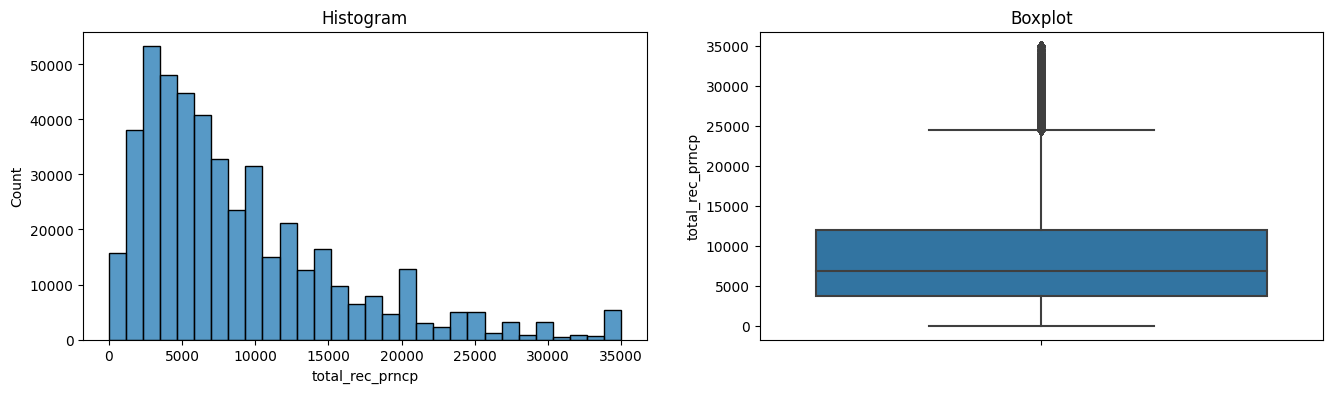

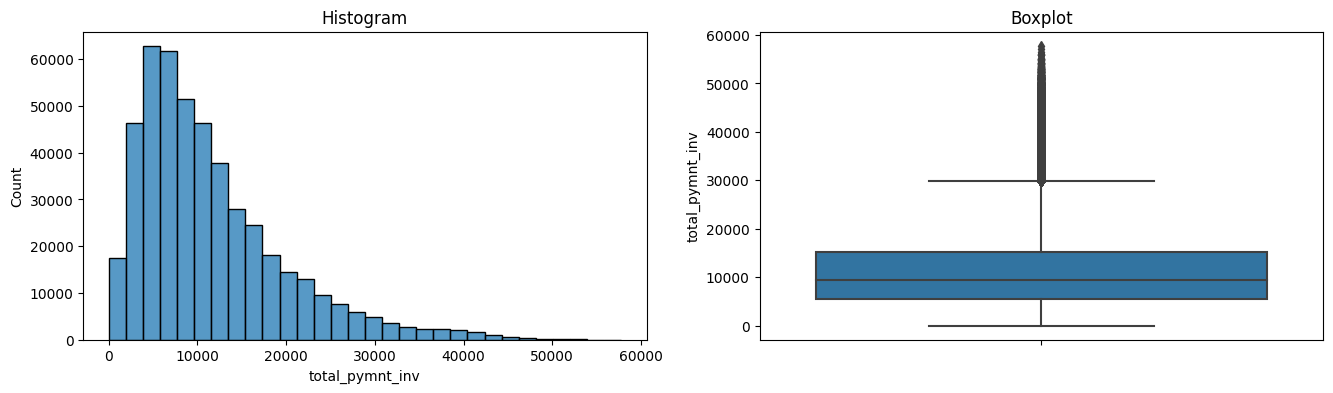

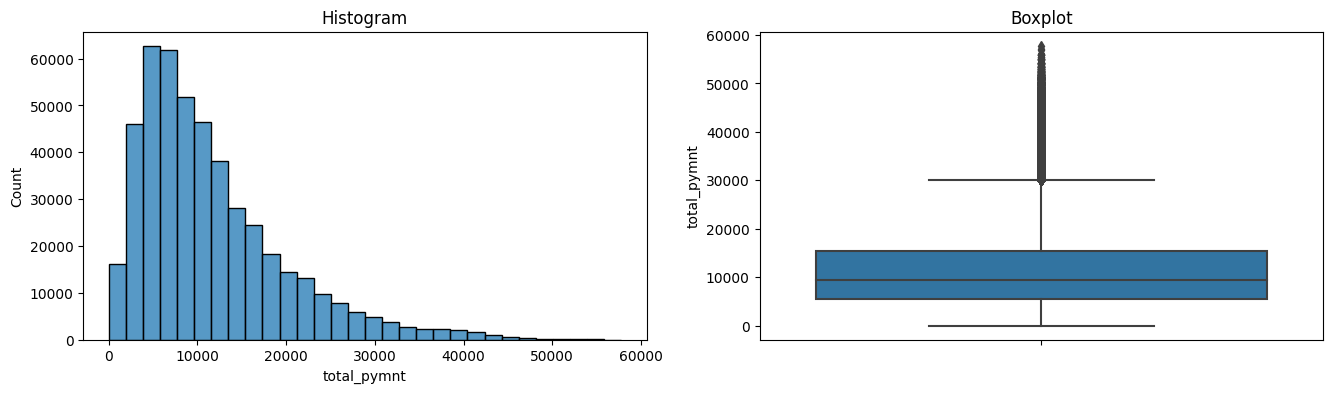

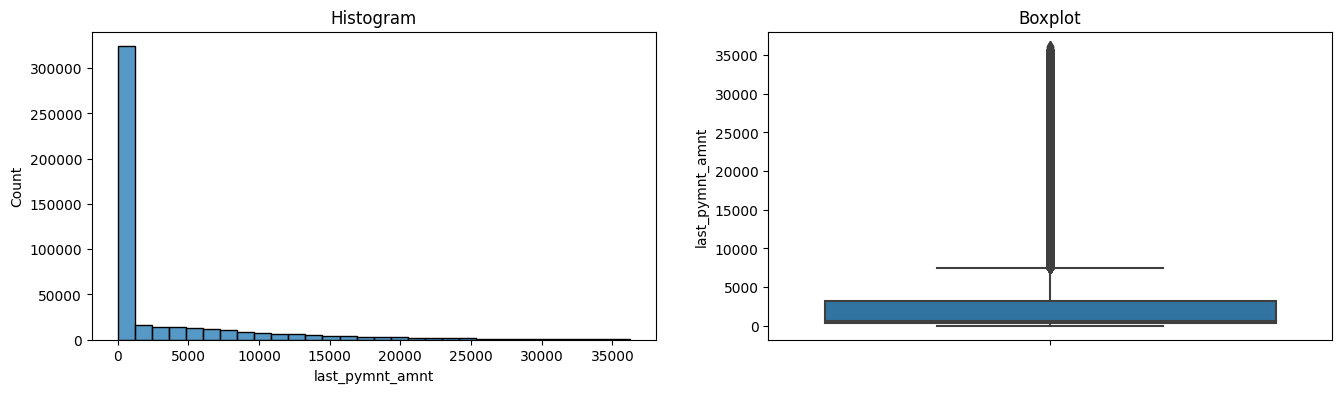

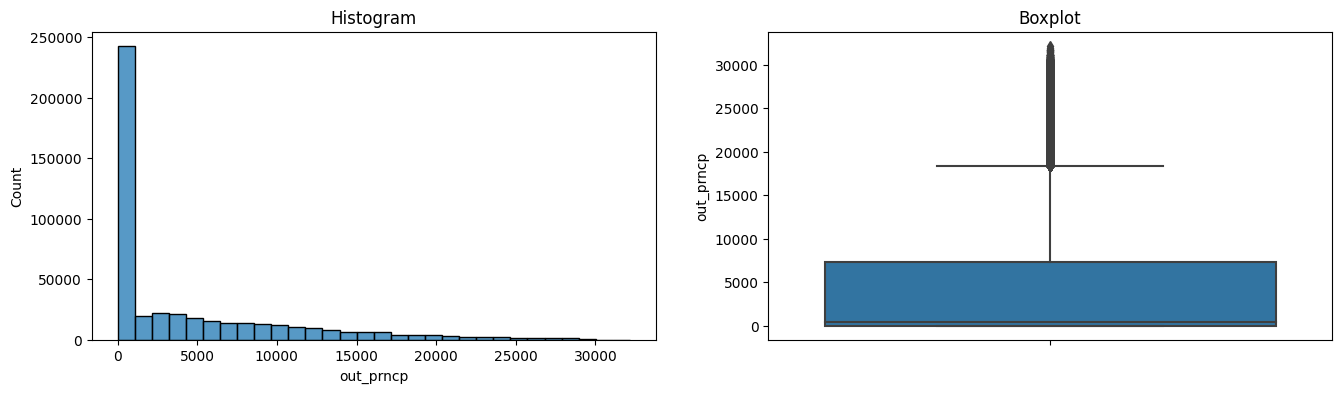

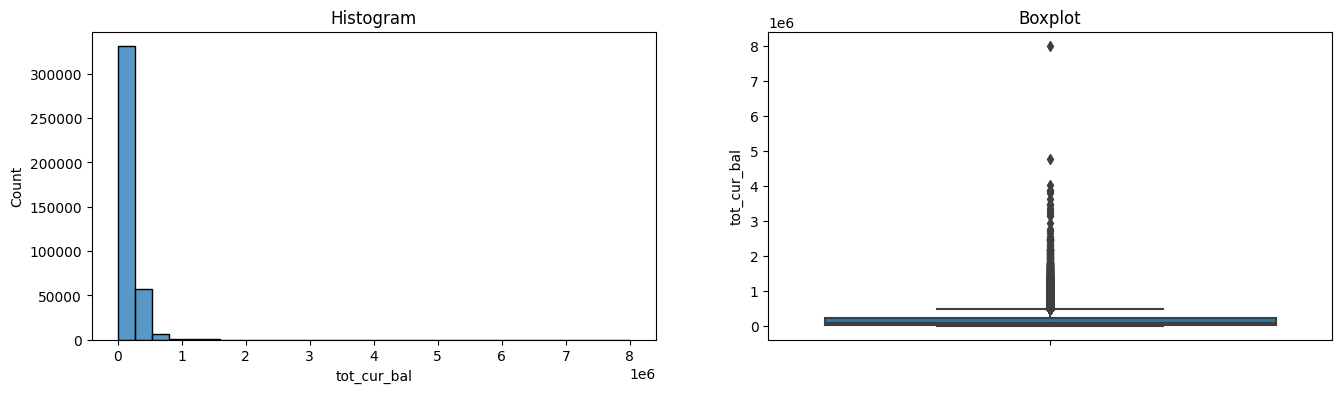

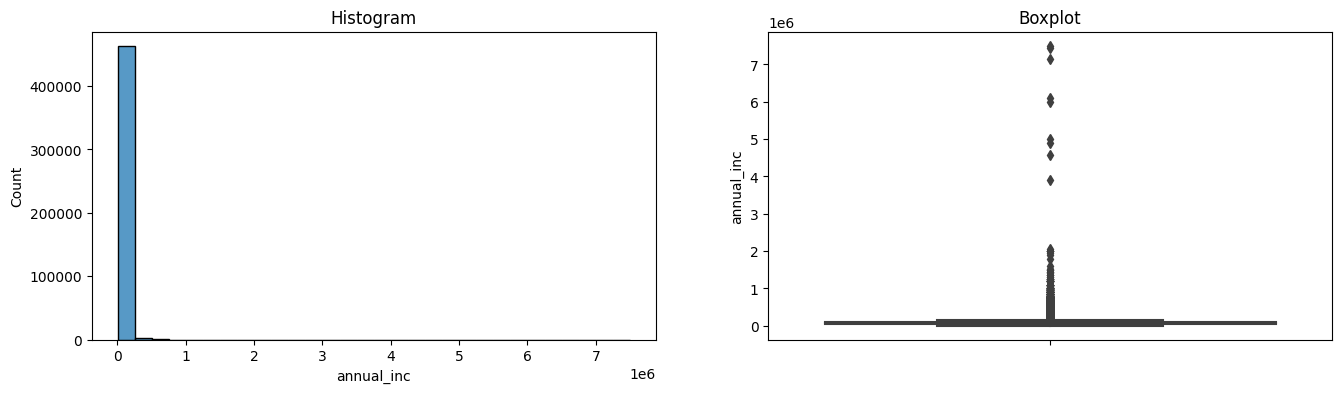

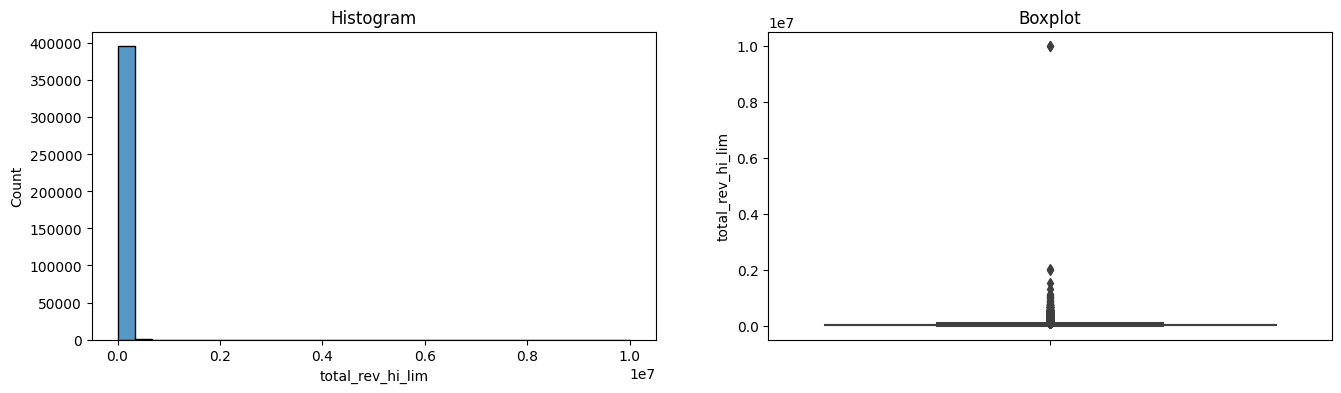

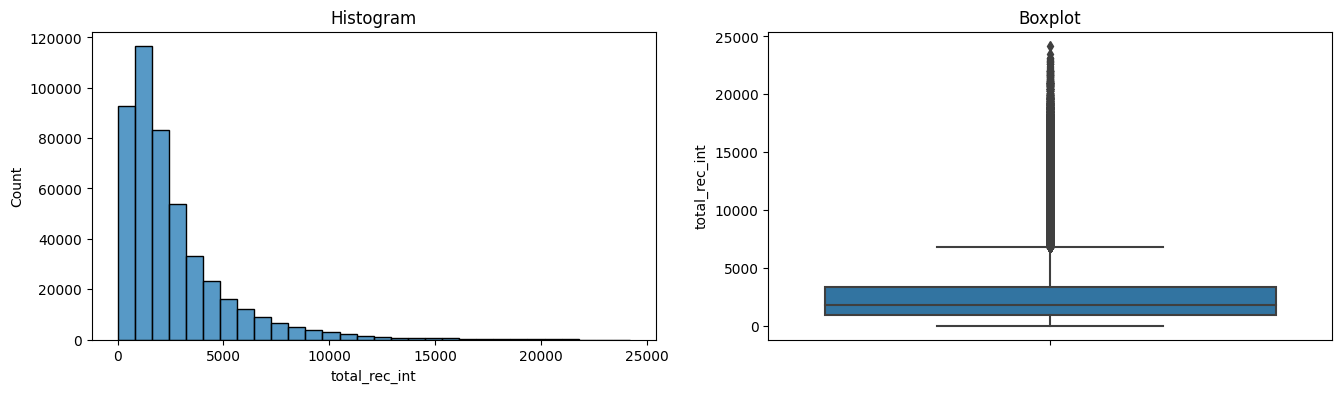

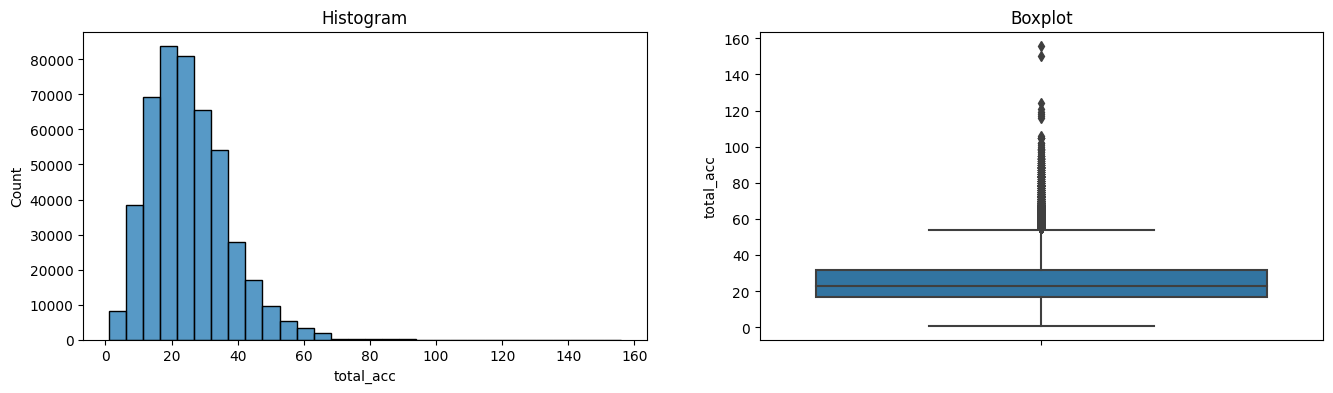

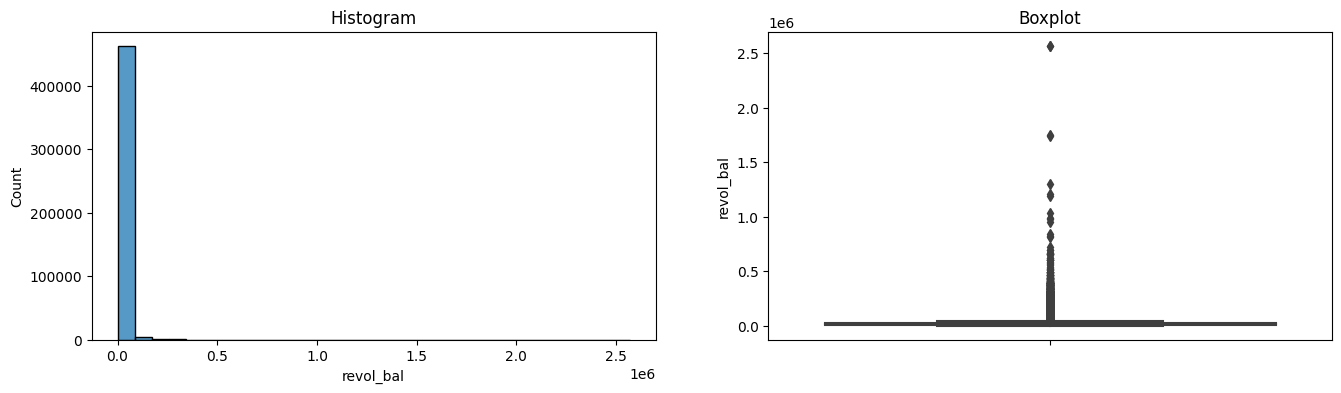

In [52]:
diagnostic_plots(X_train, 'total_rec_prncp')
diagnostic_plots(X_train, 'total_pymnt_inv')
diagnostic_plots(X_train, 'total_pymnt')
diagnostic_plots(X_train, 'last_pymnt_amnt')
diagnostic_plots(X_train, 'out_prncp')
diagnostic_plots(X_train, 'tot_cur_bal')
diagnostic_plots(X_train, 'annual_inc')
diagnostic_plots(X_train, 'total_rev_hi_lim')
diagnostic_plots(X_train, 'total_rec_int')
diagnostic_plots(X_train, 'total_acc')
diagnostic_plots(X_train, 'revol_bal')

In [53]:
print('total_rec_prncp Skewness Value   : ', X_train['total_rec_prncp'].skew())
print('total_pymnt_inv Skewness Value   : ', X_train['total_pymnt_inv'].skew())
print('total_pymnt Skewness Value       : ', X_train['total_pymnt'].skew())
print('last_pymnt_amnt Skewness Value   : ', X_train['last_pymnt_amnt'].skew())
print('out_prncp Skewness Value         : ', X_train['out_prncp'].skew())
print('annual_inc Skewness Value        : ', X_train['annual_inc'].skew())
print('total_rev_hi_lim Skewness Value  : ', X_train['total_rev_hi_lim'].skew())
print('total_rec_int Skewness Value     : ', X_train['total_rec_int'].skew())
print('total_acc Skewness Value         : ', X_train['total_acc'].skew())
print('revol_bal Skewness Value         : ', X_train['revol_bal'].skew())

total_rec_prncp Skewness Value   :  1.4489202480335948
total_pymnt_inv Skewness Value   :  1.4060582501395147
total_pymnt Skewness Value       :  1.4077933950658088
last_pymnt_amnt Skewness Value   :  2.5645486856561206
out_prncp Skewness Value         :  1.5841237578711633
annual_inc Skewness Value        :  30.661792732753806
total_rev_hi_lim Skewness Value  :  92.50743469928376
total_rec_int Skewness Value     :  2.264512667355717
total_acc Skewness Value         :  0.8150648598164569
revol_bal Skewness Value         :  18.87457464523533


###Outlier detection for skewed variables

In [54]:
def find_skewed_boundaries(X_train, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

finding upper limmit and lower limit for each numerical columns

In [55]:
total_rec_prncp_upper, total_rec_prncp_lower = find_skewed_boundaries(X_train, 'total_rec_prncp', 1.5)
total_rec_prncp_upper, total_rec_prncp_lower

total_pymnt_inv_upper, total_pymnt_inv_lower = find_skewed_boundaries(X_train, 'total_pymnt_inv', 1.5)
total_pymnt_inv_upper, total_pymnt_inv_lower

total_pymnt_upper, total_pymnt_lower = find_skewed_boundaries(X_train, 'total_pymnt', 1.5)
total_pymnt_upper, total_pymnt_lower

last_pymnt_amnt_upper , last_pymnt_amnt_lower  = find_skewed_boundaries(X_train, 'last_pymnt_amnt', 1.5)
last_pymnt_amnt_upper , last_pymnt_amnt_lower

out_prncp_upper, out_prncp_lower = find_skewed_boundaries(X_train, 'out_prncp', 1.5)
out_prncp_upper, out_prncp_lower

annual_inc_upper, annual_inc_lower = find_skewed_boundaries(X_train, 'annual_inc', 1.5)
annual_inc_upper, annual_inc_lower

total_rev_hi_lim_upper, total_rev_hi_lim_lower = find_skewed_boundaries(X_train, 'total_rev_hi_lim', 1.5)
total_rev_hi_lim_upper, total_rev_hi_lim_lower

total_rec_int_upper, total_rec_int_lower = find_skewed_boundaries(X_train, 'total_rec_int', 1.5)
total_rec_int_upper, total_rec_int_lower

total_acc_upper, total_acc_lower = find_skewed_boundaries(X_train, 'total_acc', 1.5)
total_acc_upper, total_acc_lower

revol_bal_upper, revol_bal_lower = find_skewed_boundaries(X_train, 'revol_bal', 1.5)
revol_bal_upper, revol_bal_lower

print('total_rec_prncp upper limit  : ', total_rec_prncp_upper)
print('total_rec_prncp lower limit  : ', total_rec_prncp_lower, '\n')
print('total_pymnt_inv upper limit  : ', total_pymnt_inv_upper)
print('total_pymnt_inv lower limitt : ', total_pymnt_inv_lower, '\n')
print('total_pymnt upper limit      : ', total_pymnt_upper)
print('total_pymnt lower limit      : ', total_pymnt_lower, '\n')
print('last_pymnt_amnt upper limit  : ', last_pymnt_amnt_upper)
print('last_pymnt_amnt lower limit  : ', last_pymnt_amnt_lower, '\n')
print('out_prncp upper limit        : ', out_prncp_upper)
print('out_prncp lower limitt       : ', out_prncp_lower, '\n')
print('annual_inc upper limit       : ', annual_inc_upper)
print('annual_inc lower limit       : ', annual_inc_lower, '\n')
print('total_rev_hi_lim upper limit : ', total_rev_hi_lim_upper)
print('total_rev_hi_lim lower limit : ', total_rev_hi_lim_lower, '\n')
print('total_rec_int upper limit    : ', total_rec_int_upper)
print('total_rec_int lower limit    : ', total_rec_int_lower, '\n')
print('total_acc upper limit        : ', total_acc_upper)
print('total_acc lower limit        : ', total_acc_lower, '\n')
print('revol_bal upper limit        : ', revol_bal_upper)
print('revol_bal lower limit        : ', revol_bal_lower, '\n')

total_rec_prncp upper limit  :  24437.16
total_rec_prncp lower limit  :  -8728.6 

total_pymnt_inv upper limit  :  29829.4
total_pymnt_inv lower limitt :  -9098.84 

total_pymnt upper limit      :  29942.2081265
total_pymnt lower limit      :  -9081.924317500001 

last_pymnt_amnt upper limit  :  7499.845000000001
last_pymnt_amnt lower limit  :  -3999.715000000001 

out_prncp upper limit        :  18354.125
out_prncp lower limitt       :  -11012.474999999999 

annual_inc upper limit       :  154900.0
annual_inc lower limit       :  -20940.0 

total_rev_hi_lim upper limit :  74500.0
total_rev_hi_lim lower limit :  -23100.0 

total_rec_int upper limit    :  6825.405000000001
total_rec_int lower limit    :  -2563.5950000000003 

total_acc upper limit        :  54.5
total_acc lower limit        :  -5.5 

revol_bal upper limit        :  41213.0
revol_bal lower limit        :  -14467.0 



In [56]:
print('% total_rec_prncp more than upper limit       : {}'.format(len(X_train[X_train['total_rec_prncp'] > total_rec_prncp_upper])/len(X_train) * 100))
print('% total_pymnt_inv more than upper limit       : {}'.format(len(X_train[X_train['total_pymnt_inv'] > total_pymnt_inv_upper])/len(X_train) * 100))
print('% total_pymnt  more than upper limit          : {}'.format(len(X_train[X_train['total_pymnt'] > total_pymnt_upper])/len(X_train) * 100))
print('% last_pymnt_amnt more than upper limit       : {}'.format(len(X_train[X_train['last_pymnt_amnt'] > last_pymnt_amnt_upper])/len(X_train) * 100))
print('% out_prncp more than upper limit             : {}'.format(len(X_train[X_train['out_prncp'] > out_prncp_upper])/len(X_train) * 100))
print('% annual_inc more than upper limit            : {}'.format(len(X_train[X_train['annual_inc'] > annual_inc_upper])/len(X_train) * 100))
print('% total_rev_hi_lim more than upper limit      : {}'.format(len(X_train[X_train['total_rec_prncp'] > total_rec_prncp_upper])/len(X_train) * 100))
print('% total_rec_int more than upper limit         : {}'.format(len(X_train[X_train['total_rec_prncp'] > total_rec_prncp_upper])/len(X_train) * 100))
print('% total_acc more than upper limit             : {}'.format(len(X_train[X_train['total_rec_prncp'] > total_rec_prncp_upper])/len(X_train) * 100))
print('% revol_bal more than upper limit             : {}'.format(len(X_train[X_train['total_rec_prncp'] > total_rec_prncp_upper])/len(X_train) * 100))


% total_rec_prncp more than upper limit       : 4.419131186063683
% total_pymnt_inv more than upper limit       : 4.088247819386702
% total_pymnt  more than upper limit          : 4.081507602658096
% last_pymnt_amnt more than upper limit       : 15.049372087537034
% out_prncp more than upper limit             : 5.035248269755729
% annual_inc more than upper limit            : 4.2570596110894945
% total_rev_hi_lim more than upper limit      : 4.419131186063683
% total_rec_int more than upper limit         : 4.419131186063683
% total_acc more than upper limit             : 4.419131186063683
% revol_bal more than upper limit             : 4.419131186063683


Capped the data with outliers below 15% using winsorizer

###Handling Outliers

Before capped

In [57]:
print("beforw capping")
X_train.describe()

beforw capping


,total_rec_prncp,total_pymnt_inv,total_pymnt,last_pymnt_amnt,out_prncp,tot_cur_bal,annual_inc,total_rev_hi_lim,total_rec_int,total_acc,revol_bal
count,326399.000000,326399.000000,326399.000000,326399.000000,326399.000000,3.263990e+05,3.263990e+05,3.263990e+05,326399.000000,326399.000000,3.263990e+05
mean,8855.005944,11462.183321,11532.524884,3115.363292,4424.399413,1.299211e+05,7.326935e+04,2.925211e+04,2591.930588,25.049035,1.622607e+04
std,7028.951917,8254.622098,8265.535390,5545.592841,6365.225569,1.415377e+05,5.561801e+04,3.263839e+04,2488.500414,11.593403,2.053868e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,3706.160000,5499.480000,5551.495000,312.620000,0.000000,3.350400e+04,4.500000e+04,1.500000e+04,956.775000,17.000000,6.419000e+03
50%,6801.350000,9343.840000,9407.550191,545.920000,476.970000,8.120900e+04,6.273000e+04,2.290000e+04,1819.650000,23.000000,1.178200e+04
75%,12000.000000,15217.145000,15292.117915,3154.620000,7384.145000,1.847625e+05,8.850000e+04,3.440000e+04,3308.520000,32.000000,2.035800e+04
max,35000.020000,57777.580000,57777.579870,36234.440000,31681.540000,4.772549e+06,7.500000e+06,9.999999e+06,23450.380000,156.000000,2.568995e+06


In [58]:
print("after capping")
X_test.describe()

after capping


,total_rec_prncp,total_pymnt_inv,total_pymnt,last_pymnt_amnt,out_prncp,tot_cur_bal,annual_inc,total_rev_hi_lim,total_rec_int,total_acc,revol_bal
count,139886.000000,139886.000000,139886.000000,139886.000000,139886.000000,1.398860e+05,1.398860e+05,1.398860e+05,139886.000000,139886.000000,1.398860e+05
mean,8891.701524,11487.881315,11559.729238,3143.864871,4376.609348,1.307829e+05,7.329403e+04,2.923620e+04,2581.086083,25.095156,1.623986e+04
std,7038.026188,8253.075100,8265.839332,5575.985128,6331.236231,1.419777e+05,5.340618e+04,3.828793e+04,2472.822252,11.620229,2.099380e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,3716.187500,5497.612500,5554.152500,312.610000,0.000000,3.387475e+04,4.500000e+04,1.500000e+04,958.722500,17.000000,6.402000e+03
50%,6854.430000,9381.655000,9441.175000,546.600000,368.520000,8.248700e+04,6.300000e+04,2.280000e+04,1815.765000,23.000000,1.172100e+04
75%,12000.000000,15250.350000,15336.860000,3259.457500,7253.187500,1.853720e+05,8.900000e+04,3.430000e+04,3291.850000,32.000000,2.026975e+04
max,35000.030000,56047.850000,56087.909920,36043.810000,32160.380000,8.000078e+06,7.141778e+06,9.999999e+06,24205.620000,102.000000,2.560703e+06


In [59]:
cols=['total_rec_prncp','total_pymnt_inv','total_pymnt','out_prncp','annual_inc','total_rev_hi_lim',
                                     'total_rec_int','total_acc','revol_bal']


In [60]:
def capping(X, cols, from_low_bond, from_high_bond):

  for col in cols:
    stats.mstats.winsorize(a=X[col], limits=(from_low_bond, from_high_bond), inplace =True)


In [61]:
capping(X_train, cols, 0.1, 0.1)
capping(X_test, cols, 0.1, 0.1)

In [62]:
print("after capping")
X_train.describe()

after capping


,total_rec_prncp,total_pymnt_inv,total_pymnt,last_pymnt_amnt,out_prncp,tot_cur_bal,annual_inc,total_rev_hi_lim,total_rec_int,total_acc,revol_bal
count,326399.000000,326399.000000,326399.000000,326399.000000,326399.000000,3.263990e+05,326399.000000,326399.000000,326399.000000,326399.000000,326399.000000
mean,8341.052501,10846.467896,10914.249194,3115.363292,3899.095600,1.299211e+05,68598.895592,26235.462725,2336.614322,24.523317,14207.846740
std,5472.531716,6321.445601,6336.168925,5545.592841,5065.132485,1.415377e+05,27752.948432,14248.623401,1681.091947,9.534807,9248.794201
min,2145.370000,3249.920000,3309.660000,0.000000,0.000000,0.000000e+00,34000.000000,8900.000000,503.470000,11.000000,3395.000000
25%,3706.160000,5499.480000,5551.495000,312.620000,0.000000,3.350400e+04,45000.000000,15000.000000,956.775000,17.000000,6419.000000
50%,6801.350000,9343.840000,9407.550191,545.920000,476.970000,8.120900e+04,62730.000000,22900.000000,1819.650000,23.000000,11782.000000
75%,12000.000000,15217.145000,15292.117915,3154.620000,7384.145000,1.847625e+05,88500.000000,34400.000000,3308.520000,32.000000,20358.000000
max,19040.270000,22741.670000,22840.080000,36234.440000,14093.010000,4.772549e+06,120000.000000,54700.000000,5728.600000,41.000000,31947.000000


In [63]:
print("after capping")
X_test.describe()

after capping


,total_rec_prncp,total_pymnt_inv,total_pymnt,last_pymnt_amnt,out_prncp,tot_cur_bal,annual_inc,total_rev_hi_lim,total_rec_int,total_acc,revol_bal
count,139886.000000,139886.000000,139886.000000,139886.000000,139886.000000,1.398860e+05,139886.00000,139886.000000,139886.000000,139886.000000,139886.000000
mean,8378.454577,10877.055833,10946.120438,3143.864871,3846.423484,1.307829e+05,68665.06813,26126.480141,2329.362023,24.653025,14169.277869
std,5490.266122,6334.680206,6348.924404,5575.985128,5013.338067,1.419777e+05,27778.88485,14144.812658,1672.203062,9.412932,9239.052120
min,2150.000000,3269.930000,3328.965423,0.000000,0.000000,0.000000e+00,34000.00000,8900.000000,506.730000,12.000000,3382.000000
25%,3716.187500,5497.612500,5554.152500,312.610000,0.000000,3.387475e+04,45000.00000,15000.000000,958.722500,17.000000,6402.000000
50%,6854.430000,9381.655000,9441.175000,546.600000,368.520000,8.248700e+04,63000.00000,22800.000000,1815.765000,23.000000,11721.000000
75%,12000.000000,15250.350000,15336.860000,3259.457500,7253.187500,1.853720e+05,89000.00000,34300.000000,3291.850000,32.000000,20269.750000
max,19075.000000,22788.270000,22886.830000,36043.810000,13940.250000,8.000078e+06,120000.00000,54300.000000,5706.930000,41.000000,31913.000000


In [64]:
X.shape

(466285, 13)

##One-Hot-Encoding

In [65]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

##Standardization

In [66]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Handling Imbalance data

In [67]:
smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

#check value counts before and after oversampling
print('Before OverSampling:\n{}'.format(y_train.value_counts()))
print('\nAfter OverSampling:\n{}'.format(y_train_smt.value_counts()))

Before OverSampling:
1    289898
0     36501
Name: good_bad_loan, dtype: int64

After OverSampling:
1    289898
0    289898
Name: good_bad_loan, dtype: int64


#Build Model

##Model Ensemble

###Bagging

####1. BaggingClassifier

In [68]:
tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, random_state=42)
bagging_clf.fit(X_train_smt, y_train_smt)

#predicting
y_pred_bagging = bagging_clf.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_bagging, digits=4, target_names = target_names))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.4455    0.9239    0.6011     15685
   good loan     0.9889    0.8548    0.9169    124201

    accuracy                         0.8625    139886
   macro avg     0.7172    0.8893    0.7590    139886
weighted avg     0.9280    0.8625    0.8815    139886



####2. ExtraTreesClassifier

In [69]:
extraTree = ExtraTreesClassifier()
extraTree.fit(X_train_smt, y_train_smt)

#predicting
y_pred_tree = extraTree.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_tree, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.8399    0.8204    0.8300     15685
   good loan     0.9774    0.9802    0.9788    124201

    accuracy                         0.9623    139886
   macro avg     0.9086    0.9003    0.9044    139886
weighted avg     0.9620    0.9623    0.9621    139886



###Boosting

####1. GradientBoostingClassifier

In [70]:
grad_boost_clf = GradientBoostingClassifier()
grad_boost_clf.fit(X_train_smt, y_train_smt)

#predicting
y_pred_grad = grad_boost_clf.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_grad, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.6959    0.8202    0.7530     15685
   good loan     0.9768    0.9547    0.9656    124201

    accuracy                         0.9397    139886
   macro avg     0.8364    0.8875    0.8593    139886
weighted avg     0.9453    0.9397    0.9418    139886



####2. AdaBoostClassifier

In [71]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train_smt, y_train_smt)

#predicting
y_pred_ada = ada_boost.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_ada, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.4021    0.8631    0.5486     15685
   good loan     0.9798    0.8379    0.9033    124201

    accuracy                         0.8407    139886
   macro avg     0.6909    0.8505    0.7260    139886
weighted avg     0.9150    0.8407    0.8635    139886



####3. XGBoostClassifier

In [72]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_smt, y_train_smt)

#predicting
y_pred_xgb = xgb_clf.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_xgb, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.7453    0.8479    0.7933     15685
   good loan     0.9805    0.9634    0.9719    124201

    accuracy                         0.9505    139886
   macro avg     0.8629    0.9057    0.8826    139886
weighted avg     0.9541    0.9505    0.9518    139886



the best accuracy among all the models above is the Extra Tree Classifier model, with 96% accuracy and 81-82%  bad loan recall and 97-98% good loan recall, recall is a measure of the classifier's completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives.

#Save model

In [73]:
pickle.dump(scaler, open("scaler.pickle", "wb"))
ssc = pickle.load(open("scaler.pickle", 'rb'))

pickle.dump(extraTree, open('extraTree.pkl','wb'))

extraTreeClassifier = pickle.load(open('extraTree.pkl','rb'))